In [20]:
import json
import re
import datetime as dt
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import matplotlib.pyplot as plt

### Store my Twitter Dev credentials locally in a file

In [2]:
myCreds = {
   
}

with open('mycredentials.json', 'w') as f:
    json.dump(myCreds, f)

### verify my account with Twython

In [3]:
from twython import Twython

with open("mycredentials.json") as infile:
    credentials = json.load(infile)

twitter_client = Twython(credentials["consumer_key"],
                         credentials["consumer_secret"],
                         credentials["access_token"],
                         credentials["access_token_secret"])
twitter_client


<Twython: QvOyN4yvW0AlacqJHJ03m6Ic3>

### Retrieve data of a single user, the output is a list/dict

In [5]:
response = twitter_client.get_user_timeline(screen_name = 'FCBayern', count = 200)
type(response)


list

### Explore list

In [6]:
response[1].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [7]:
response[1]['created_at']

'Mon May 20 18:10:00 +0000 2019'

In [8]:
response[2]['entities']['hashtags'][0]['text']

'Bundesliga'

### Frequency of tweets 

In [32]:
first_date = response[0]['created_at']
last_date = response[199]['created_at']
check = pd.to_datetime(last_date)
check

#print(last_date)
#print('--> 200 tweets in 5 days')

pandas._libs.tslibs.timestamps.Timestamp

### Top 5 most used hashtags

In [10]:
# loop over tweets = entities, then loop over all entries of hashtags to extract text
hashtag_list = []

for i in range(0,len(response)):
    curr_dict = response[i]['entities']['hashtags']
    for j in range(0,len(curr_dict)):
        curr_hash = curr_dict[j]['text']
        hashtag_list.append(curr_hash)
        
hashtag_list[1:10]

['MEIS7ER',
 'FCBAmateure',
 'BayernAmateure',
 'MEIS7ER',
 'MiaSanMia',
 'FCBayernYouthCup',
 'MiaSanMia',
 'VisitingFriends',
 'MEIS7ER']

In [11]:
# loop over unique hashtags and count occurrence in list

unique_hashs = list(set(hashtag_list)) # have to convert set object into list
count_list = []

for x in range(0,len(unique_hashs)):
    curr_count = hashtag_list.count(unique_hashs[x])
    count_list.append(curr_count)  

In [17]:
# convert results into data frame and sort

hash_counts = pd.DataFrame(columns = ['hash','counts'])

hash_counts['hash'] = unique_hashs
hash_counts['counts'] = count_list

top_hash = hash_counts.sort_values('counts',ascending = False).head(5)
top_hash

,hash,counts
54,MiaSanMia,47
15,FCBSGE,43
17,FCBayern,34
25,MEIS7ER,33
37,packmas,18


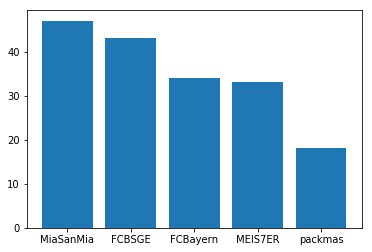

In [28]:
plt.bar(top_hash['hash'],top_hash['counts'])
None

### Choose a relevant keyword and report how many times it has been used in the tweets that you scraped 

In [13]:
my_keyword = 'Bundesliga'
response[1]['text']

'Heute vor 2 Jahren...🕰\n\nKommt, holt nochmal die Taschentücher raus - der Marienplatz singt für @philipplahm! 🎼😢… https://t.co/VicI3GGt5Q'

In [14]:
result_list = []

for i in range(0,len(response)):
    curr_text = response[i]['text']
    result = curr_text.count(my_keyword)
    result_list.append(result)
    
print('The keyword %s was used %d times in the last 200 Tweets!'% (my_keyword,sum(result_list)))

The keyword Bundesliga was used 16 times in the last 200 Tweets!
